<a href="https://colab.research.google.com/github/Kaleab1999/text-analytics-NLP/blob/main/tweet_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import model_selection, preprocessing, linear_model, metrics
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import ensemble
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from xgboost import XGBClassifier

import contractions

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from textblob import Word
nltk.download('wordnet')

from termcolor import colored
from warnings import filterwarnings
filterwarnings('ignore')

from sklearn import set_config
set_config(print_changed_only = False)

import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
train=pd.read_csv('/content/drive/MyDrive/dataset/hate_train.csv')

In [3]:
test=pd.read_csv('/content/drive/MyDrive/dataset/hate_test.csv')


In [4]:
train.head(n = 10).style.background_gradient(cmap = "summer")

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦
7,8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦
9,10,0,@user @user welcome here ! i'm it's so #gr8 !


In [5]:
train.shape, test.shape

((31962, 3), (17197, 2))

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17197 entries, 0 to 17196
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      17197 non-null  int64 
 1   tweet   17197 non-null  object
dtypes: int64(1), object(1)
memory usage: 268.8+ KB


In [8]:
train.duplicated().sum()

0

In [9]:
test.duplicated().sum()

0

In [10]:
train.groupby("label").count().style.background_gradient(cmap = "summer")

,id,tweet
label,,
0,29720,29720
1,2242,2242


In [11]:
train["tweet"] = train["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))
test["tweet"] = test["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [12]:
train.head().style.background_gradient(cmap = "summer")

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation


In [13]:
con={
    "ain't": "am not / are not / is not / has not / have not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is / how does",
"I'd": "I had / I would",
"I'd've": "I would have",
"I'll": "I shall / I will",
"I'll've": "I shall have / I will have",
"I'm": "I am",
"I've": "I have",
"I've'n't":"I have not",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
'u': 'you',
"u've": "you have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

In [14]:
def cont(x):
  if (type(x) is str):
    for key in con:
      value=con[key]
      x=x.replace(key,value)
    return x
  else:
    return x
train['tweet']=train['tweet'].apply(lambda x: cont(x))
test['tweet']=test['tweet'].apply(lambda x: cont(x))


In [15]:
train.head()

,id,label,tweet
0,1,0,@youser when a father is dysfyounctional and i...
1,2,0,@youser @youser thanks for #lyft credit i cann...
2,3,0,bihday yoyour majesty
3,4,0,#model i love you take with you all the time i...
4,5,0,factsgyouide: society now #motivation


In [16]:
# remove URL
train['tweet']=train['tweet'].apply(lambda x:re.sub('http://\S+|https://\S+', '', x))
test['tweet']=test['tweet'].apply(lambda x:re.sub('http://\S+|https://\S+', '', x))

In [17]:
train.head()

,id,label,tweet
0,1,0,@youser when a father is dysfyounctional and i...
1,2,0,@youser @youser thanks for #lyft credit i cann...
2,3,0,bihday yoyour majesty
3,4,0,#model i love you take with you all the time i...
4,5,0,factsgyouide: society now #motivation


In [18]:
test.head()

,id,tweet
0,31963,#styoudiolife #aislife #reqyouires #passion #d...
1,31964,@youser #white #syoupremacists want everyone t...
2,31965,safe ways to heal yoyour #acne!! #altwaystohea...
3,31966,is the hp and the cyoursed child book youp for...
4,31967,"3rd #bihday to my amazing, hilarioyous #nephew..."


In [19]:
#delete punctuation marks from "tweet" columns

train["tweet"] = train["tweet"].str.replace('[^a-zA-Z]',' ')
test["tweet"] = test["tweet"].str.replace('[^a-zA-Z]',' ')


In [20]:
#delete stopwords from "tweet" columns

stops=stopwords.words("english")
unwanted=['no','nor','not']
stops=[ele for ele in stops if ele not in unwanted]
train['tweet'] = train['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stops))
test['tweet'] = test['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stops))


In [21]:
#drop "id" column from datasets
train.drop("id", axis = 1,inplace=True)
test.drop("id", axis = 1,inplace=True)

train.head().style.background_gradient(cmap = "summer")

,label,tweet
0,0,youser father dysfyounctional selfish drags kids dysfyounction ryoun
1,0,youser youser thanks lyft credit cannot youse cayouse not offer wheelchair vans pdx disapointed getthanked
2,0,bihday yoyour majesty
3,0,model love take time
4,0,factsgyouide society motivation


In [22]:
test.head()

,tweet
0,styoudiolife aislife reqyouires passion dedica...
1,youser white syoupremacists want everyone see ...
2,safe ways heal yoyour acne altwaystoheal healt...
3,hp cyoursed child book youp reservations alrea...
4,rd bihday amazing hilarioyous nephew eli ahmir...


In [26]:
from nltk.stem import WordNetLemmatizer #to perform Lemmatizzation
from nltk.tokenize import word_tokenize
import nltk
nltk.download('omw-1.4')


lemmatize=WordNetLemmatizer()

train['tweet'] = train['tweet'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
test['tweet'] = test['tweet'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()])) 

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [28]:
train.head().style.background_gradient(cmap = "summer")

,label,tweet
0,0,youser father dysfyounctional selfish drag kid dysfyounction ryoun
1,0,youser youser thanks lyft credit cannot youse cayouse not offer wheelchair van pdx disapointed getthanked
2,0,bihday yoyour majesty
3,0,model love take time
4,0,factsgyouide society motivation


In [29]:
x = train["tweet"]
y = train["label"]

train_x, test_x, train_y, test_y = model_selection.train_test_split(x, y,
                                                                    test_size = 0.25,
                                                                    shuffle = True,
                                                                    random_state = 11)


In [30]:
vectorizer = CountVectorizer()
vectorizer.fit(train_x)

x_train_count = vectorizer.transform(train_x)
x_test_count = vectorizer.transform(test_x)

x_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [31]:
tf_idf_word_vectorizer = TfidfVectorizer()
tf_idf_word_vectorizer.fit(train_x)

x_train_tf_idf_word = tf_idf_word_vectorizer.transform(train_x)
x_test_tf_idf_word = tf_idf_word_vectorizer.transform(test_x)

x_train_tf_idf_word.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [32]:
log = linear_model.LogisticRegression()
log_model = log.fit(x_train_count, train_y)
accuracy = model_selection.cross_val_score(log_model,
                                           x_test_count,
                                           test_y,
                                           cv = 20).mean()

print("\nLogistic regression model with 'count-vectors' method")
print("Accuracy ratio: ", accuracy)


Logistic regression model with 'count-vectors' method
Accuracy ratio:  0.9473157894736843


In [33]:
log = linear_model.LogisticRegression()
log_model = log.fit(x_train_tf_idf_word, train_y)
accuracy = model_selection.cross_val_score(log_model,
                                           x_test_tf_idf_word,
                                           test_y,
                                           cv = 20).mean()

print("\nLogistic regression model with 'tf-idf' method")
print("Accuracy ratio: ", accuracy)


Logistic regression model with 'tf-idf' method
Accuracy ratio:  0.9341773182957395


In [34]:
xgb = XGBClassifier()
xgb_model = xgb.fit(x_train_count,train_y)
accuracy = model_selection.cross_val_score(xgb_model,
                                           x_test_count,
                                           test_y,
                                           cv = 20).mean()

print("\nXGBoost model with 'count-vectors' method")
print("Accuracy ratio: ", accuracy)


XGBoost model with 'count-vectors' method
Accuracy ratio:  0.9363051378446116


In [35]:
xgb = XGBClassifier()
xgb_model = xgb.fit(x_train_tf_idf_word,train_y)
accuracy = model_selection.cross_val_score(xgb_model, 
                                           x_test_tf_idf_word, 
                                           test_y, 
                                           cv = 20).mean()

print("\nXGBoost model with 'tf-idf' method")
print("Accuracy ratio: ", accuracy)


XGBoost model with 'tf-idf' method
Accuracy ratio:  0.9346773182957392


In [39]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB().fit(x_train_count,train_y)
accuracy = model_selection.cross_val_score(nb, 
                                           x_test_tf_idf_word, 
                                           test_y, 
                                           cv = 20).mean()

print("\n NB model with 'count-vectors' method")
print("Accuracy ratio: ", accuracy)


 NB model with 'count-vectors' method
Accuracy ratio:  0.928671052631579


In [40]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB().fit(x_train_tf_idf_word,train_y)
accuracy = model_selection.cross_val_score(nb, 
                                           x_test_tf_idf_word, 
                                           test_y, 
                                           cv = 20).mean()

print("\n NB model with 'count-vectors' method")
print("Accuracy ratio: ", accuracy)


 NB model with 'count-vectors' method
Accuracy ratio:  0.928671052631579


<function matplotlib.pyplot.show>

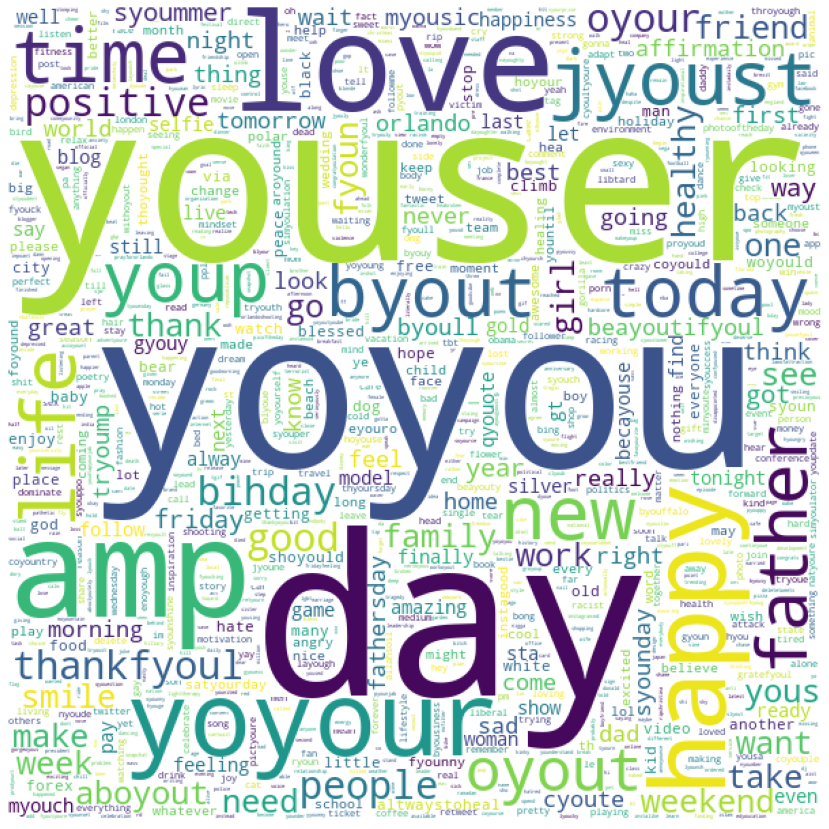

In [41]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

text = " ".join(i for i in train.tweet)

wc = WordCloud(background_color = "white",
               width = 600,
               height = 600,
               contour_width = 0,
               contour_color = "red",
               max_words = 1000,
               scale = 1,
               collocations = False,
               repeat = True,
               min_font_size = 1)

wc.generate(text)

plt.figure(figsize = [15, 15])
plt.imshow(wc)
plt.axis("off")
plt.show